<a href="https://colab.research.google.com/github/nikhilkatiyarnituk/helpapp/blob/main/dropout__notebook_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
#  it creates 20 values linearly spaced from -1 to 1
X_train = np.linspace(-1,1,20)

In [ ]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [ ]:
X_test = np.linspace(-1,1,20)

In [ ]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

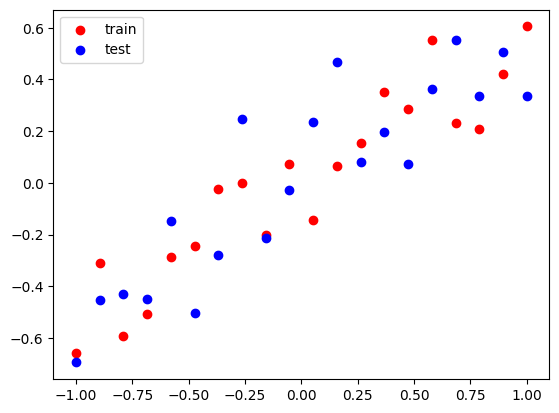

In [ ]:
plt.scatter(X_train,y_train ,color = 'red',label='train')
plt.scatter(X_test,y_test ,color = 'blue',label='test')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=1))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))

adam=Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mse'])
history= model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=0)
#


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
_ , train_mse = model.evaluate(X_train,y_train,verbose=0)
_ , test_mse = model.evaluate(X_test,y_test,verbose=0)
print('Train MSE:',train_mse)
print('Test MSE:',test_mse)

Train MSE: 0.011825253255665302
Test MSE: 0.037103064358234406


In [ ]:
y_pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


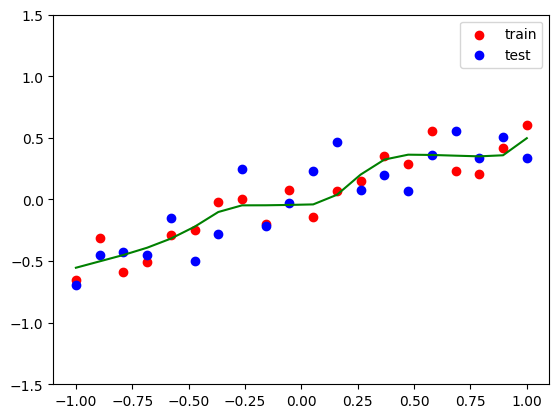

In [ ]:
plt.figure()
plt.scatter(X_train,y_train,color='red',label='train')
plt.scatter(X_test,y_test,color='blue',label='test')
plt.plot(X_test,y_pred,color='green')
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()